We apply metabolic network expansion for investigating biosynthetic capacities of the E. coli core model.
We import the SBML file of the E. coli core model which can be downloaded from BiGG.
Using the function read_from_bigg() automatically finds BiGG cofactors in the model and adds them to the cofactor pairs attribute.

In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import moped
import itertools as it

from typing import Iterable, Any, List


def flatten(x: Iterable[Iterable[Any]]) -> list[Any]:
    return [j for i in x for j in i]


def group_mask(groups: dict[str, list[str]]) -> list[int]:
    return flatten([it.repeat(num, len(group)) for num, group in enumerate(groups.values())])


m = moped.load_model_from_bigg("/home/marvin/Documents/models/fba/iJO1366.xml")

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Moped offers an environment for topological methods.
Cofactor and reversibility duplications provide biologically feasible topological analysis.
They can be removed using the function "remove_cofactor_duplication" and "remove_reversibility_duplication".

In [2]:
topo = moped.to_topological(m)

For every compound in the network, we calculate all producible compounds with the "scope()" function. We add water to the seed and enable the argument "include_weak_cofactors" to add weak mock cofactors to the seed to unblock cofactor dependet reactions in the network.

We then plot the total number of producible metabolites for every compound in the network.

In [3]:
scope_compounds = [i for i in m.compounds if "C" in m.compounds[i].formula and i[-2:] != "_e"]
scopes = {
    i: len(moped.scope(topo, [i, "h2o_c"] + m.get_weak_cofactor_duplications()).compounds)
    for i in scope_compounds
}

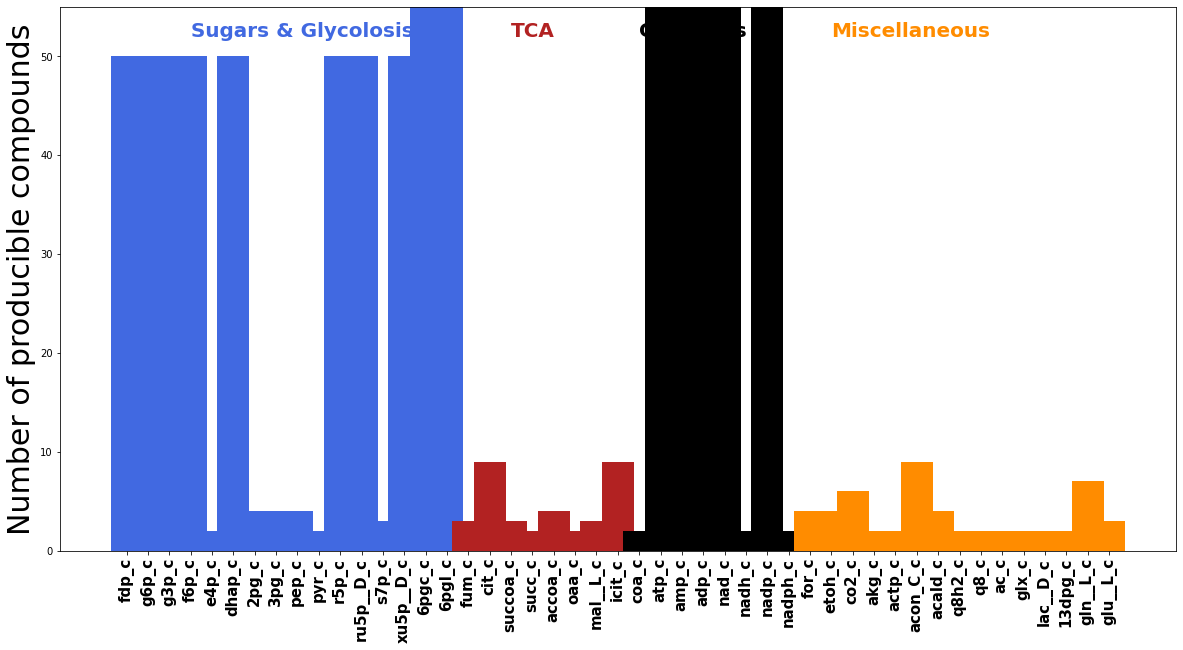

In [4]:
groups = {
    "Glycolosis": [
        "fdp_c",
        "g6p_c",
        "g3p_c",
        "f6p_c",
        "e4p_c",
        "dhap_c",
        "2pg_c",
        "3pg_c",
        "pep_c",
        "pyr_c",
        "r5p_c",
        "ru5p__D_c",
        "s7p_c",
        "xu5p__D_c",
        "6pgc_c",
        "6pgl_c",
    ],
    "TCA": [
        "fum_c",
        "cit_c",
        "succoa_c",
        "succ_c",
        "accoa_c",
        "oaa_c",
        "mal__L_c",
        "icit_c",
    ],
    "Cofactors": [
        "coa_c",
        "atp_c",
        "amp_c",
        "adp_c",
        "nad_c",
        "nadh_c",
        "nadp_c",
        "nadph_c",
    ],
    "Others": [
        "for_c",
        "etoh_c",
        "co2_c",
        "akg_c",
        "actp_c",
        "acon_C_c",
        "acald_c",
        "q8h2_c",
        "q8_c",
        "ac_c",
        "glx_c",
        "lac__D_c",
        "13dpg_c",
        "gln__L_c",
        "glu__L_c",
    ],
}


order = []
for i in list(groups):
    for j in groups[i]:
        order.append(j)

colors = ["royalblue", "firebrick", "black", "darkorange"]
group_colors = [colors[i] for i in group_mask(groups)]


x = flatten(groups.values())
y = [scopes[i] for i in x]


fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x, y, width=1.5, color=group_colors)
ax.set_ylim(0, 55)
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90, fontsize=15, fontweight="bold")
ax.text(3, 52, "Sugars & Glycolosis", weight="bold", color="royalblue", fontsize=20)
ax.text(18, 52, "TCA", weight="bold", color="firebrick", fontsize=20)
ax.text(24, 52, "Cofactors", weight="bold", color="black", fontsize=20)
ax.text(33, 52, "Miscellaneous", weight="bold", color="darkorange", fontsize=20)
ax.set_ylabel("Number of producible compounds", fontsize=30)
plt.show()